# Indice de Végétation
Test de l'indice NDVI (Normalized Difference Vegetation Index) : NDVI = ((IR - R)/(IR + R))

http://desktop.arcgis.com/fr/arcmap/10.3/manage-data/raster-and-images/ndvi-function.htm

In [1]:
import keras

import h5py as h5
import numpy as np
PATH_DATA = 'hackathon_small_data_eightieth.h5'

C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
import pandas as pd


In [3]:
f = h5.File(PATH_DATA)
images_total = len(f['S2'][()])

## Exemple pour l'image 0

In [5]:
image_0= np.array(f['S2'][0,:,:,:])
image_0_R= np.array(f['S2'][0,:,:,0])
image_0_G= np.array(f['S2'][0,:,:,1])
image_0_B= np.array(f['S2'][0,:,:,2])
image_0_IR= np.array(f['S2'][0,:,:,3])

In [6]:
label_0 = f['TOP_LANDCOVER'][0][0]
label_0

12.0

In [7]:
NDVI_image_0 = (image_0_IR -image_0_R)/ (image_0_IR +image_0_R)

In [8]:
NDVI_image_0.mean()


0.5816814

In [9]:
import matplotlib.pyplot as plt
plt.imshow(NDVI_image_0, cmap= 'Greens')

## Calcul pour les images

In [10]:
images_R= np.array(f['S2'][:,:,:,0])
images_IR= np.array(f['S2'][:,:,:,3])

In [14]:
NDVI_mean = []
label_test =[]
#NDVI_stddev = []
for i in range(images_total):
    NDVI= (images_IR[i] - images_R[i]) /(images_IR[i] + images_R[i])
    NDVI_mean.append(NDVI.mean())
    
#    NDVI_stddev.append(NDVI.std())

C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


2596.1094

In [79]:
f['TOP_LANDCOVER'][()][2][0]

5.0

In [16]:
pd_NDVI_tot = pd.DataFrame(f['TOP_LANDCOVER'][()])
pd_NDVI_tot['label'] = pd.DataFrame(f['TOP_LANDCOVER'][()])
pd_NDVI_tot['mean_NDVI'] = pd.DataFrame(NDVI_mean)
#pd_NDVI_tot['std_NDVI'] = pd.DataFrame(NDVI_stddev)
pd_NDVI_tot = pd_NDVI_tot.drop(0,1)
pd_NDVI_tot.head()


,label,mean_NDVI
0,12.0,0.581681
1,12.0,0.460823
2,5.0,0.454870
3,5.0,0.495072
4,2.0,0.526492


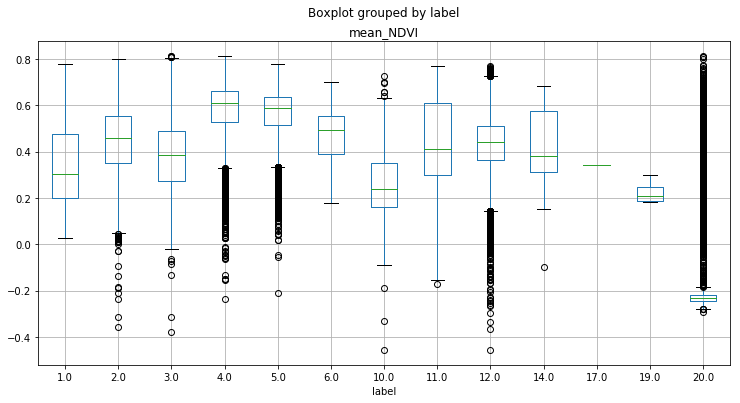

In [17]:
pd_NDVI_tot.boxplot(column='mean_NDVI', by = 'label', figsize=(12,6))

# Test rapports couleurs

In [4]:
images_R= np.array(f['S2'][:,:,:,0])
images_G= np.array(f['S2'][:,:,:,1])
images_B= np.array(f['S2'][:,:,:,2])
images_IR= np.array(f['S2'][:,:,:,3])

In [88]:
RonG = []
BonG = []
BonR = []

for i in range(images_total):
    if (images_G[i].any() == 0.0):
        RonG.append(9999.0)
        BonG.append(9999.0)
    else :
        RonG.append((images_R[i] /images_G[i]).mean())
        BonG.append((images_B[i] /images_G[i]).mean())
        
        
    if (images_R[i].any() == 0.0):
        BonR.append(9999.0)
    else:
        BonR.append((images_B[i] /images_R[i]).mean())

matrix = pd.DataFrame(f['TOP_LANDCOVER'][()])
matrix['label'] = pd.DataFrame(f['TOP_LANDCOVER'][()])
matrix['RonG'] = pd.DataFrame(RonG)
matrix['BonG'] = pd.DataFrame(BonG)
matrix['BonR'] = pd.DataFrame(BonR)
#pd_NDVI_tot['std_NDVI'] = pd.DataFrame(NDVI_stddev)
matrix = matrix.drop(0,1)
matrix.head()

C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


,label,RonG,BonG,BonR
0,12.0,0.746500,1.045480,1.426556
1,12.0,0.934205,0.990636,1.072863
2,5.0,0.924474,0.948771,1.033567
3,5.0,0.847888,0.995265,1.194470
4,2.0,0.802731,1.025634,1.303736


In [98]:
matrix.head()

,label,RonG,BonG,BonR
0,12.0,0.746500,1.045480,1.426556
1,12.0,0.934205,0.990636,1.072863
2,5.0,0.924474,0.948771,1.033567
3,5.0,0.847888,0.995265,1.194470
4,2.0,0.802731,1.025634,1.303736


In [109]:
filterd = matrix
filtered = filtered.mask(matrix['RonG']> 1000).dropna()
filtered = filtered.mask(matrix['BonG']> 1000).dropna()
filtered = filtered.mask(matrix['BonR']> 1000).dropna()
filtered.head()

,label,RonG,BonG,BonR
0,12.0,0.746500,1.045480,1.426556
1,12.0,0.934205,0.990636,1.072863
2,5.0,0.924474,0.948771,1.033567
3,5.0,0.847888,0.995265,1.194470
4,2.0,0.802731,1.025634,1.303736


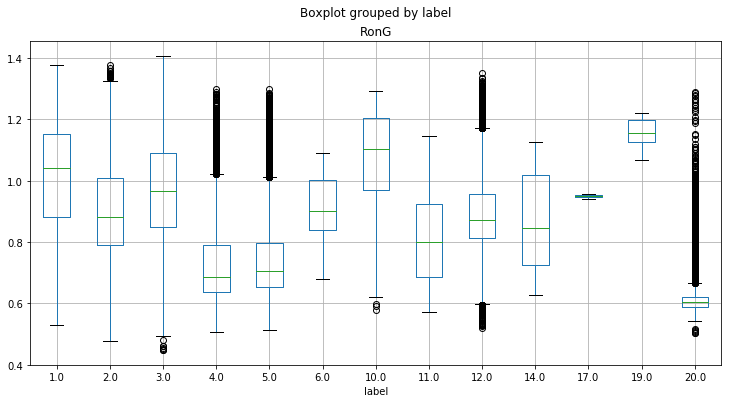

In [110]:
filtered.boxplot(column='RonG', by = 'label', figsize=(12,6))

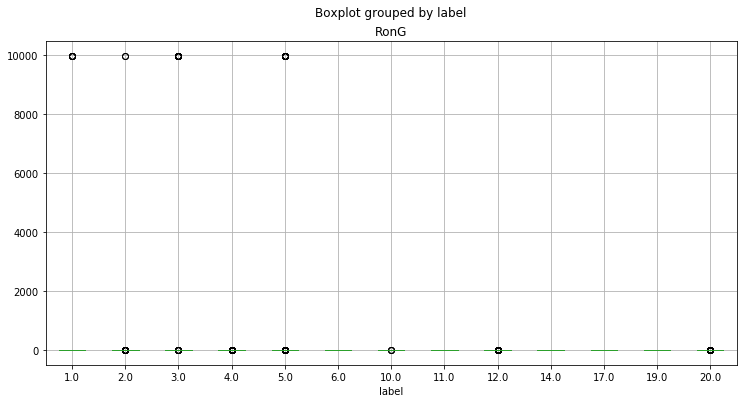

In [114]:
matrix.boxplot(column='RonG', by = 'label', figsize=(12,6))

In [123]:
matrix.count(axis = 0, numeric_only=False)

label    234000
RonG     233980
BonG     233984
BonR     233987
dtype: int64

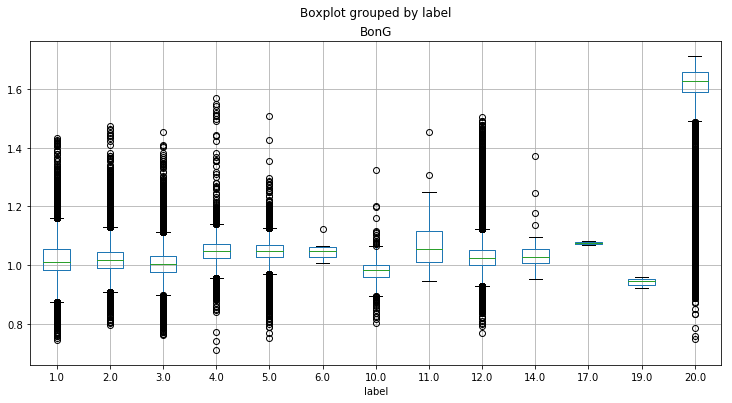

In [11]:
matrix.boxplot(column='BonG', by = 'label', figsize=(12,6))

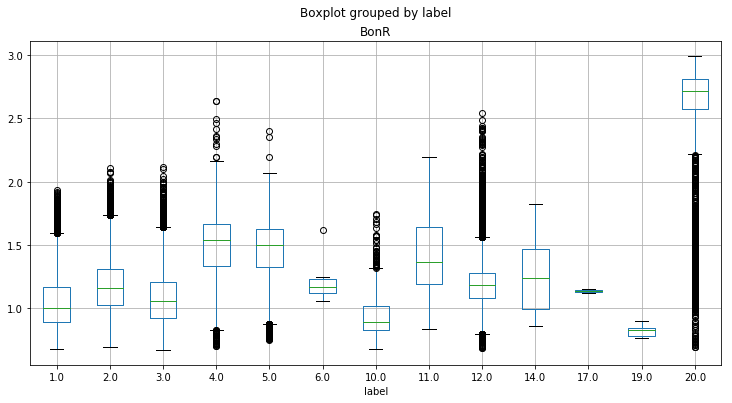

In [12]:
matrix.boxplot(column='BonR', by = 'label', figsize=(12,6))

In [18]:
matrix['NDVI']= pd_NDVI_tot['mean_NDVI']

In [19]:
matrix.head()

,label,RonG,BonG,BonR,NDVI
0,12.0,0.746500,1.045480,1.426556,0.581681
1,12.0,0.934205,0.990636,1.072863,0.460823
2,5.0,0.924474,0.948771,1.033567,0.454870
3,5.0,0.847888,0.995265,1.194470,0.495072
4,2.0,0.802731,1.025634,1.303736,0.526492


**Remarque :** RonG et BonR semblent intéressants. BonG ne sépare pas bien les classes

In [43]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [85]:
matrix['BonR'].replace('inf', np.nan)
matrix['BonR'].max()

inf

In [127]:
matrix['BonR'].dropna
matrix['RonG'].dropna
matrix['BonG'].dropna

<bound method Series.dropna of 0         1.045480
1         0.990636
2         0.948771
3         0.995265
4         1.025634
5         1.030746
6         0.988366
7         0.999749
8         1.033477
9         1.072259
10        1.080225
11        1.068912
12        1.078452
13        1.050506
14        1.058437
15        1.031071
16        1.071126
17        1.059899
18        1.050555
19        1.048447
20        1.054962
21        1.021817
22        1.066265
23        1.081067
24        1.088166
25        1.100171
26        1.084926
27        0.959105
28        0.928341
29        0.997165
            ...   
233970    0.943452
233971    0.949327
233972    0.957561
233973    0.970640
233974    0.964786
233975    0.957929
233976    0.987669
233977    1.010734
233978    1.021098
233979    1.017253
233980    1.032242
233981    1.044088
233982    1.015199
233983    1.017617
233984    1.018059
233985    1.034097
233986    1.021716
233987    1.003614
233988    0.995002
233989    1.001243


In [128]:
train, test = train_test_split(matrix ,test_size = 0.2)

In [129]:
train.size

748800

In [130]:
(train['label'].size,test['label'].size)

(187200, 46800)

In [131]:
train.head()

,label,RonG,BonG,BonR
81822,5.0,0.844483,1.071056,1.292712
421,12.0,0.880860,1.081077,1.258252
20192,12.0,0.807714,1.097574,1.359956
187725,5.0,0.583603,1.049664,1.801495
190257,3.0,0.999757,1.022612,1.055898


In [132]:
features = matrix.columns[1:]
rf = RandomForestClassifier(n_jobs=2, random_state=0)
model = rf.fit(train[features], train['label'])


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [82]:
matrix['BonR'].max()

inf